## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
plt.rcParams.update({
    # Figure
    "figure.figsize": (8, 6),
    "figure.dpi": 120,
    "figure.autolayout": True,
    "figure.facecolor": "none",

    # Fonts
    "font.family": "sans-serif",
    "font.sans-serif": ["DejaVu Sans"],
    "font.size": 12,
    "axes.titlesize": 18,
    "axes.labelsize": 16,
    "axes.labelcolor": "#666666",
    "axes.titlecolor": "#666666",
    "text.color": "#666666",

    # Axes
    "axes.facecolor": "none",
    "axes.spines.top": False,
    "axes.spines.right": False,
    "axes.linewidth": 0.8,
    "axes.edgecolor": "#666666",
    "axes.grid": True,
    "axes.axisbelow": True,

    # Grid
    "grid.color": "#f1f1f1",
    "grid.linestyle": "-",
    "grid.linewidth": 0.5,
    "grid.alpha": 0,

    # Ticks
    "xtick.color": "#666666",
    "ytick.color": "#666666",
    "xtick.major.size": 4,
    "ytick.major.size": 4,

    # Legend
    "legend.frameon": False,
    "legend.fontsize": 10,

    # Lines
    "lines.linewidth": 3,
    "lines.markersize": 6,
    "lines.markeredgewidth": 0.8,

    # Filled areas under lines
    "patch.edgecolor": "none",

    # Scatter plots
    "lines.markersize": 9,

    "axes.prop_cycle": plt.cycler(color=[
        "#5DA9E9",
        "#FF8686",
        "#6BCB77",
        "#B39CD0",
        "#FFC069",
        "#4DCCBD"
    ]),
})

## Area of Research and Development

### Number of AI publications in CS worldwide (2013-2023)

In [112]:
df = pd.read_csv("datasets/research-and-development/data/fig-111.csv")
df.set_index("Year")

,Number of AI publications in CS (in thousands)
Year,
2013,101.885
2014,104.410
2015,105.736
2016,107.266
2017,116.937
2018,139.717
2019,164.202
2020,181.121
2021,204.064


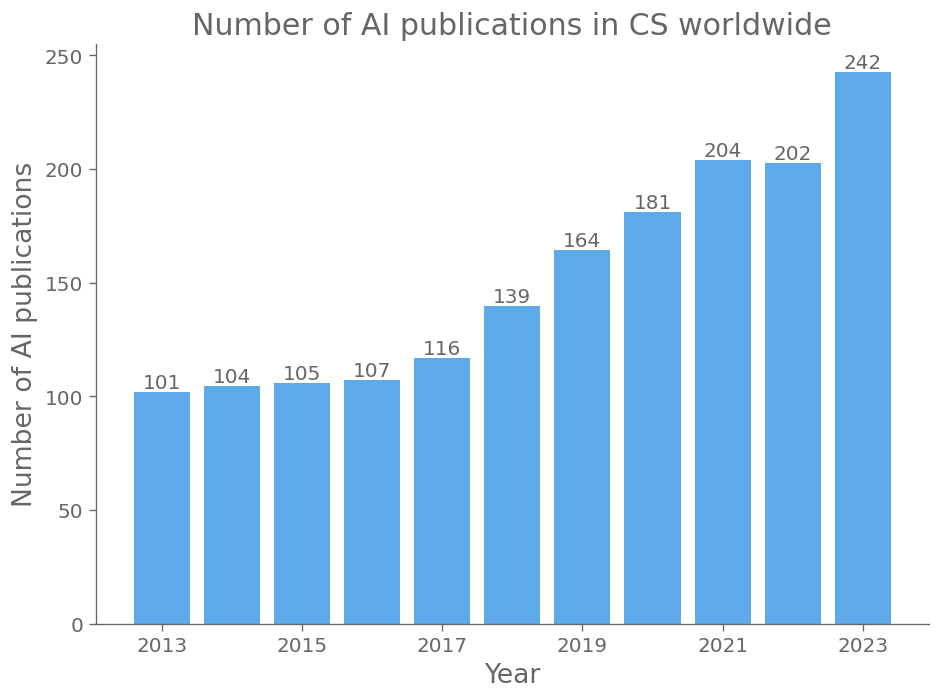

In [113]:
df = df.rename(columns={df.columns[1]: 'Amount'})

plt.bar(df['Year'], df['Amount'])

plt.title("Number of AI publications in CS worldwide")
plt.xlabel("Year")
plt.ylabel("Number of AI publications")
plt.xticks([i for i in range(2013, 2024, 2)])

for i in range(len(df['Year'])):
    x = df['Year'][i]
    y = df['Amount'][i]
    plt.text(x, y, f"{int(y)}", ha='center', va='bottom')

plt.savefig("final-plots/rd_1.png")
plt.show()

### Number of notable AI models by geographic area (2003–2024)

In [3]:
df = pd.read_csv("datasets/research-and-development/data/fig-133.csv")

In [4]:
df.columns = ['Geographic area', 'ML models count']

In [10]:
import plotly.express as px
import pandas as pd
import numpy as np

country_to_iso = {
    'Argentina': 'ARG', 'Sweden': 'SWE', 'Russia': 'RUS', 'Norway': 'NOR', 'Italy': 'ITA',
    'Spain': 'ESP', 'Iran': 'IRN', 'India': 'IND', 'Austria': 'AUT', 'Belgium': 'BEL',
    'Saudi Arabia': 'SAU', 'Ireland': 'IRL', 'Poland': 'POL', 'Taiwan': 'TWN',
    'United Arab Emirates': 'ARE', 'Finland': 'FIN', 'Czech Republic': 'CZE',
    'Netherlands': 'NLD', 'Australia': 'AUS', 'Japan': 'JPN', 'Singapore': 'SGP',
    'Hong Kong': 'HKG', 'Israel': 'ISR', 'Switzerland': 'CHE', 'South Korea': 'KOR',
    'France': 'FRA', 'Germany': 'DEU', 'Canada': 'CAN', 'United Kingdom': 'GBR',
    'China': 'CHN', 'United States': 'USA'
}

df['iso_alpha'] = df['Geographic area'].map(country_to_iso)

bins = [0, 4, 24, 99, 199, np.inf]
labels = ['1-4', '5-24', '25-99', '100-199', '200+']

df['Model Count Range'] = pd.cut(df['ML models count'], bins=bins, labels=labels)

color_map = {
    '1-4': "#E0EFFB",
    '5-24': "#9ECAEE",
    '25-99': "#5DA9E9",
    '100-199': "#308BD6",
    '200+': "#125286"
}

fig = px.choropleth(
    df,
    locations='iso_alpha',
    color='Model Count Range',
    hover_name='Geographic area',
    color_discrete_map=color_map,
    category_orders={'Model Count Range': labels},
    labels={'Model Count Range': 'Number of Models'},
    locationmode='ISO-3'
)

# Adjust margins to allow space for the legend on the right
fig.update_layout(
    margin={"r": 150, "t": 40, "l": 0, "b": 0} 
)

fig.update_layout(
    width=960,
    height=720,
    font=dict(
        family="DejaVu Sans, sans-serif",
        size=16,
        color="#666666",
    ),
    paper_bgcolor="rgba(0,0,0,0)",
    plot_bgcolor="rgba(0,0,0,0)",
    # Updated Legend Position
    legend=dict(
        title=dict(text="Number of bills"),
        font=dict(size=16),
        yanchor="middle",
        y=0.5,
        xanchor="left",
        x=1.02
    )
)

fig.write_image("final-plots/rd_2.png", width=1200, height=800, scale=5)
fig.show()

### Training compute of select notable AI models in the USA and China (2018-2024)

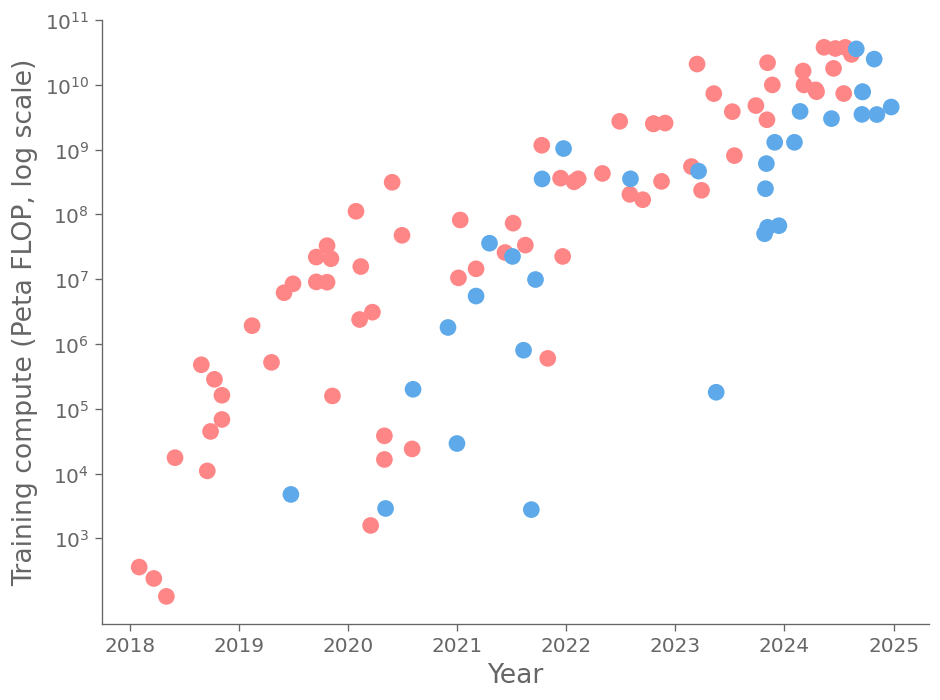

In [161]:
df = pd.read_csv("datasets/research-and-development/data/fig-1317.csv")
df['Color'] = df.apply(lambda row: '#FF8686' if row['Label'] == 'United States' else '#5DA9E9', axis=1)
df['Publication date'] = pd.to_datetime(df['Publication date'])

df = df.rename(columns={df.columns[0]: 'Date', df.columns[1]: 'Amount'})

plt.scatter(df['Date'], df['Amount'], color=df['Color'])
plt.xlabel("Year")
plt.ylabel("Training compute (Peta FLOP, log scale)")
plt.yscale('log')
plt.yticks([10**i for i in range(3, 12)])

plt.savefig("final-plots/rd_3.png")
plt.show()

## Area of Responsible AI

### Hallucination rate

In [118]:
df = pd.read_csv("datasets/responsible-ai/data/fig-328.csv")
df['Amount'] = df.apply(lambda row: float(row['Hallucination Rate'][:-1]), axis=1)

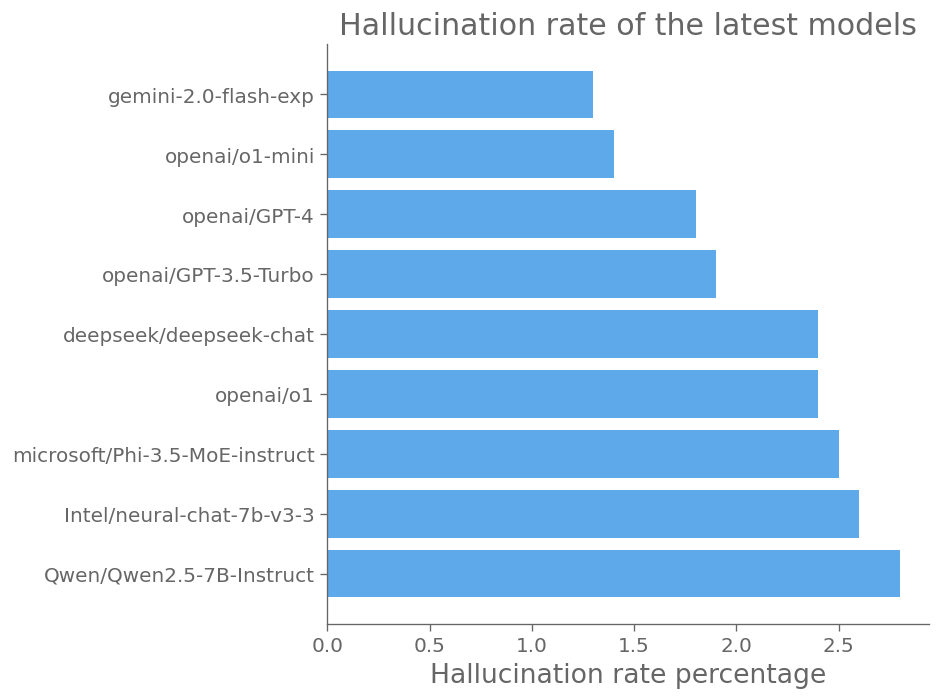

In [119]:
plt.barh(df['Model'], df['Amount'])

plt.xlabel("Hallucination rate percentage")
plt.title("Hallucination rate of the latest models")
plt.savefig("final-plots/rai_1.png")
plt.show()

### Percentage of organizations who experienced AI incidents

In [120]:
df = pd.read_csv("datasets/responsible-ai/data/fig-334.csv")

In [121]:
df = df.rename(columns={df.columns[1]: 'Amount'})
df['Amount'] = df.apply(lambda row: int(row['Amount'][:-1]), axis=1)

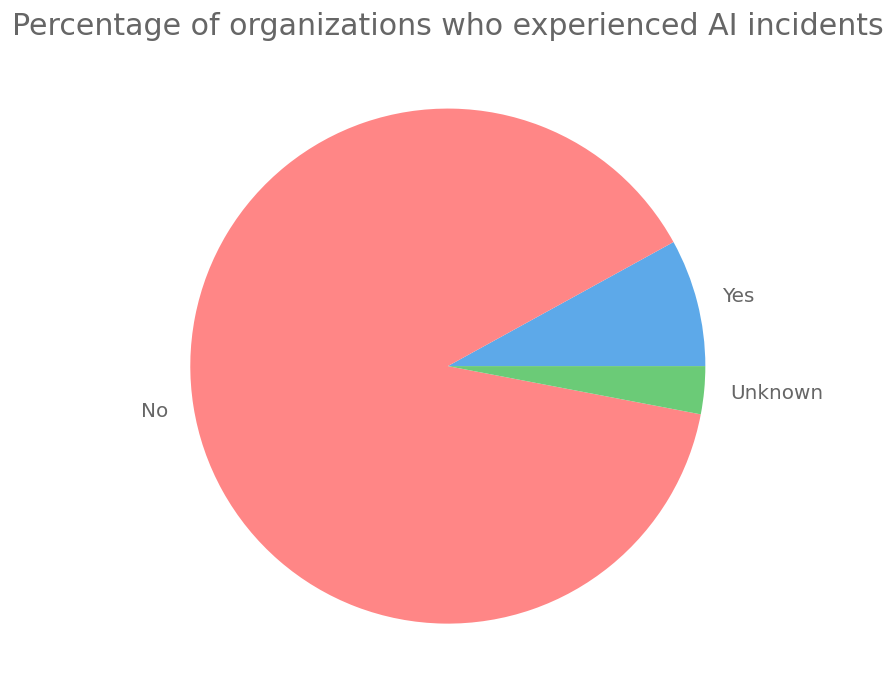

In [122]:
plt.pie(df['Amount'], labels=df['Response'])
plt.title("Percentage of organizations who experienced AI incidents")
plt.savefig("final-plots/rai_2.png")
plt.show()

### Number of AI incidents by organization

In [123]:
df = pd.read_csv("datasets/responsible-ai/data/fig-335.csv")

In [124]:
df = df.rename(columns={df.columns[0]: 'Amount', df.columns[1]: 'Label'})
df['Amount'] = df.apply(lambda row: int(row['Amount'][:-1]), axis=1)

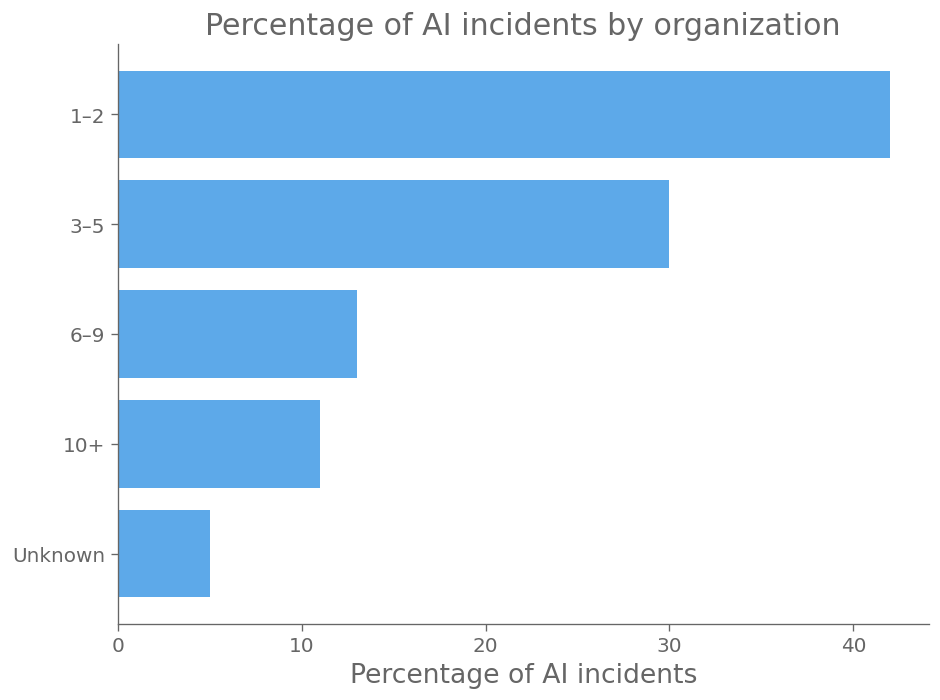

In [125]:
plt.barh(df['Label'], df['Amount'])
plt.title("Percentage of AI incidents by organization")
plt.xlabel("Percentage of AI incidents")
plt.xticks([i*10 for i in range(5)])
plt.savefig("final-plots/rai_3.png")
plt.show()

### AI related types of incidents in the past two years

In [126]:
df = pd.read_csv("datasets/responsible-ai/data/fig-339.csv")

In [127]:
df = df.rename(columns={df.columns[0]: 'Amount', df.columns[1]: 'Label'})
df['Amount'] = df.apply(lambda row: int(row['Amount'][:-1]), axis=1)

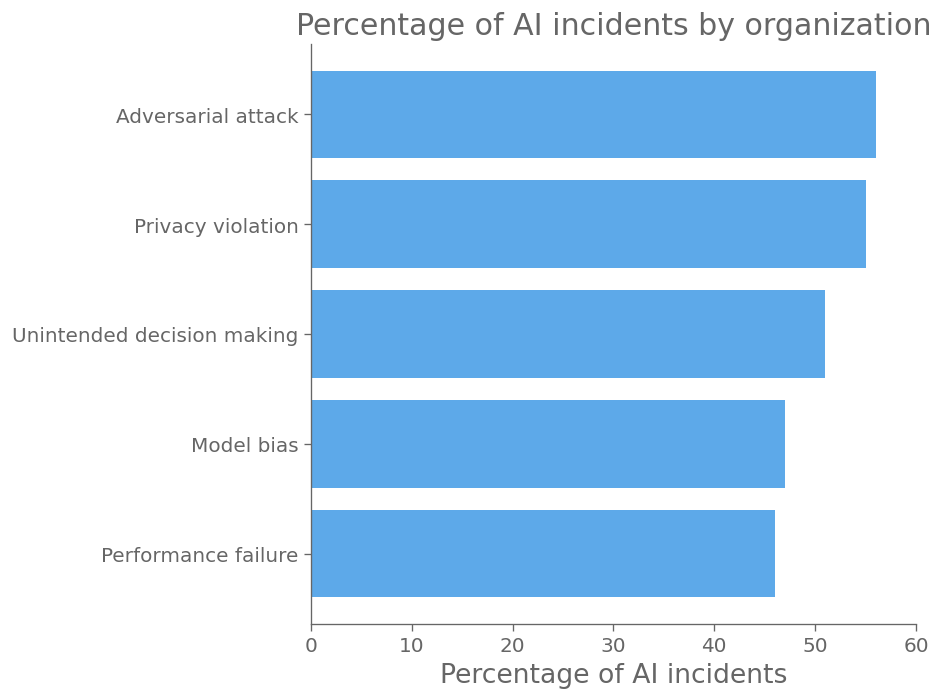

In [128]:
plt.barh(df['Label'], df['Amount'])
plt.title("Percentage of AI incidents by organization")
plt.xlabel("Percentage of AI incidents")
plt.xticks([i*10 for i in range(7)])
plt.savefig("final-plots/rai_4.png")
plt.show()

## Area of Scienze and Medicine

### Top 8 ethical concerns discussed in medical AI ethics publications, 2020-2024

In [144]:
df = pd.read_csv("datasets/science-and-medicine/data/fig-553.csv")
df = df.rename(columns={df.columns[1]: 'Amount'})

In [145]:
df['Amount'] = df.apply(lambda row: int(row['Amount'][:-1]), axis=1)

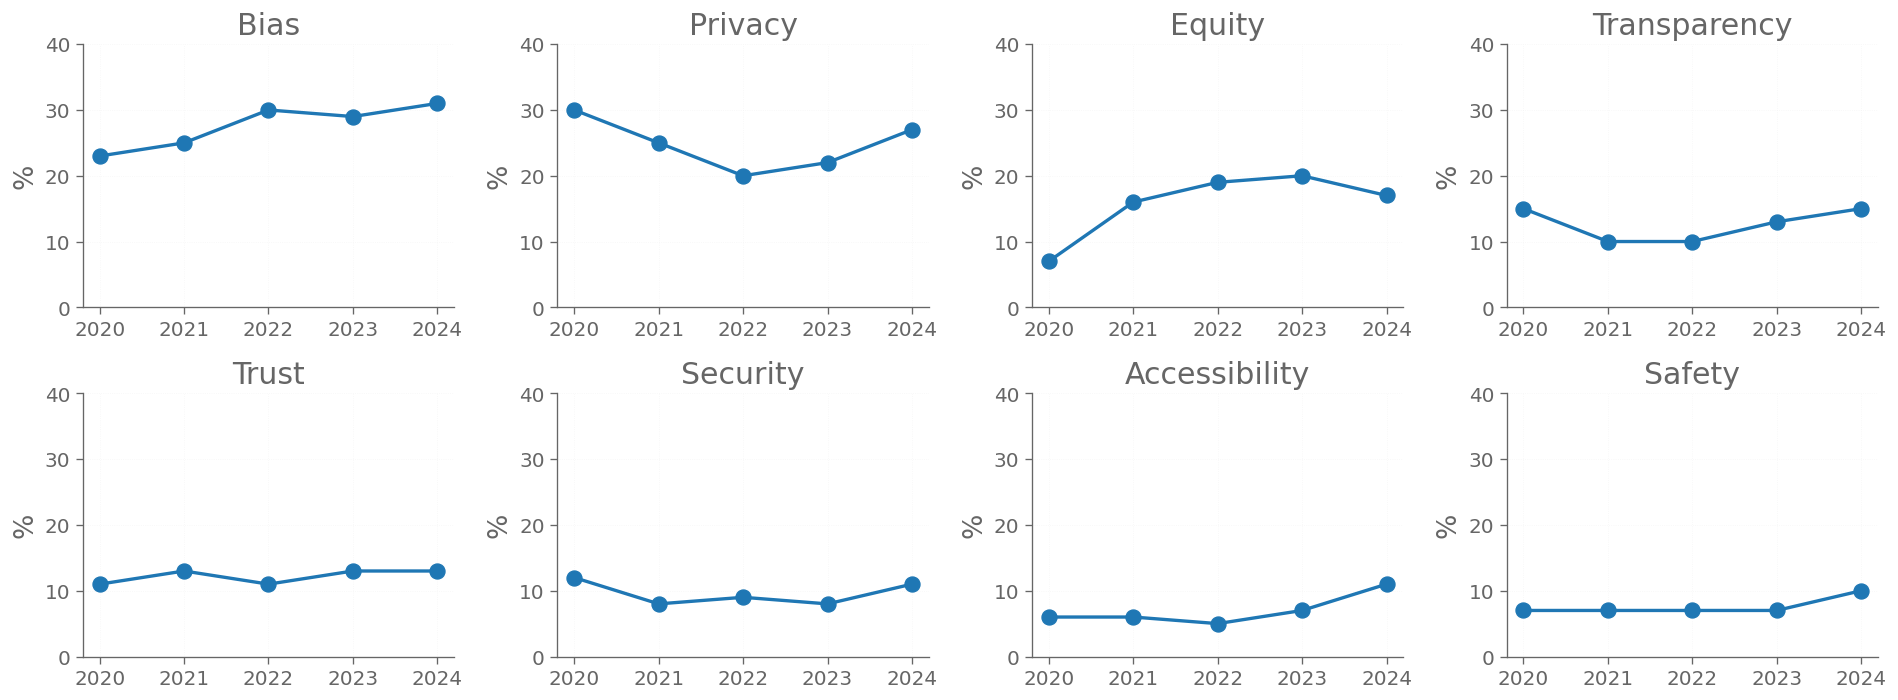

In [154]:
import math

categories = df[df.columns[0]].unique()
n_cols = 4
n_rows = math.ceil(len(categories) / n_cols)  # Compute rows needed

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(16, 3 * n_rows))
axes_flat = axes.flatten()  # Flatten to iterate easily

for i, category in enumerate(categories):
    ax = axes_flat[i]
    subset = df[df[df.columns[0]] == category].sort_values('Year')
    ax.plot(subset['Year'], subset['Amount'],
            marker='o',
            linestyle='-',
            linewidth=2,
            color='#1f77b4')
    ax.set_title(category)
    ax.set_ylim(0, 40)
    ax.set_ylabel('%')

    unique_years = subset['Year'].unique()
    ax.set_xticks(unique_years)
    ax.grid(True, linestyle=':', alpha=0.6)

# Remove any unused axes
for j in range(len(categories), len(axes_flat)):
    fig.delaxes(axes_flat[j])

plt.tight_layout()
plt.savefig("final-plots/sm_1.png")
plt.show()


### LLM performance in clinical diagnosis

In [132]:
df = pd.read_csv("datasets/science-and-medicine/data/fig-546.csv")

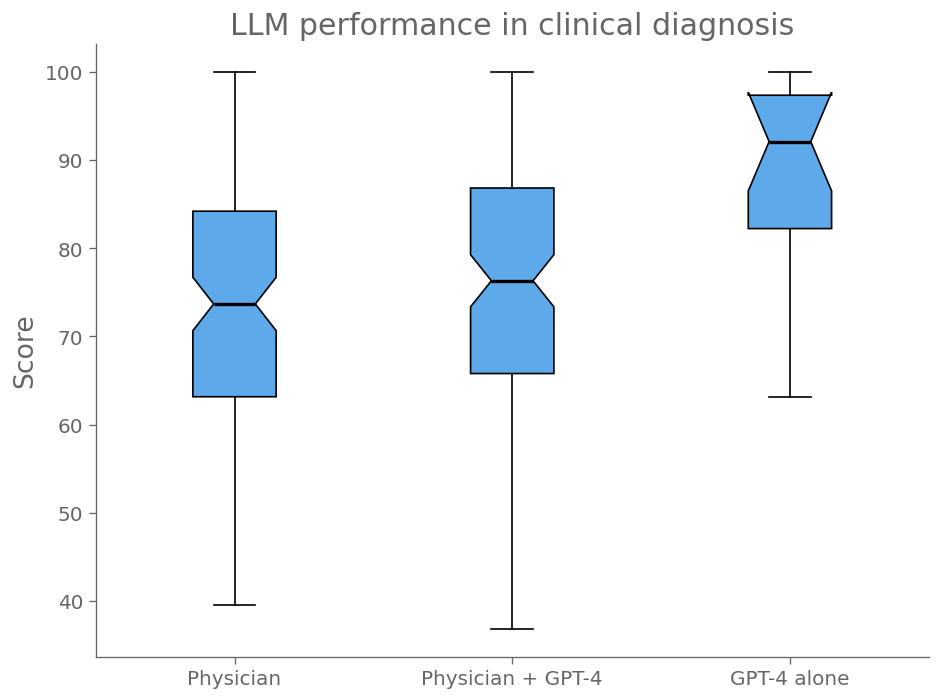

In [133]:
boxplot = [
    df[df['Group'] == 'Physician + conventional resources only']['total_pct'],
    df[df['Group'] == 'Physician + GPT-4']['total_pct'],
    df[df['Group'] == 'GPT-4 alone']['total_pct']
]

labels = [
    'Physician',
    'Physician + GPT-4',
    'GPT-4 alone'
]

fig, ax = plt.subplots(figsize=(8, 6))

# Creazione dei boxplot
bplot = ax.boxplot(boxplot, patch_artist=True, notch=True)

# Stanghette bianche
for median in bplot['medians']:
    median.set_color('black')
    median.set_linewidth(2)

# Outliers bianchi
for flier in bplot['fliers']:
    flier.set(marker='o', color='black', markerfacecolor='black', markeredgecolor='black')

# Bastoncini bianchi
for whisker in bplot['whiskers']:
    whisker.set(color='black')

# Range interquartile bianco
for cap in bplot['caps']:
    cap.set(color='black')

# Etichette sugli assi x
ax.set_xticklabels(labels)
plt.ylabel('Score')
plt.title('LLM performance in clinical diagnosis')
plt.savefig("final-plots/sm_2.png")
plt.show()

## Area of Technical Performance

### Performance of top closed/open models

In [162]:
df = pd.read_csv("datasets/technical-performance/data/fig-2134.csv")
df['Year'] = pd.to_datetime(df['Year'])

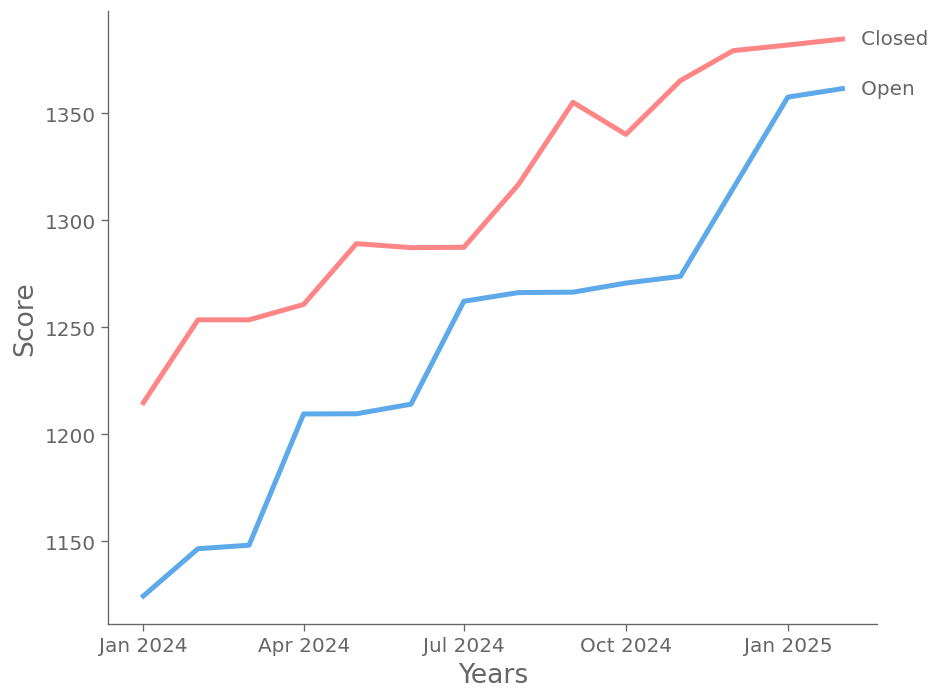

In [163]:
df_open = df[df['Label'] == 'open']
df_close = df[df['Label'] == 'closed']

plt.plot(df_open['Year'], df_open['Score'])
plt.plot(df_close['Year'], df_close['Score'])

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Get last points
last_year_open = df_open['Year'].iloc[-1]
last_score_open = df_open['Score'].iloc[-1]

last_year_close = df_close['Year'].iloc[-1]
last_score_close = df_close['Score'].iloc[-1]

# Add labels at the end of the lines
ax.text(last_year_open, last_score_open, '   Open',
        va='center', ha='left')

ax.text(last_year_close, last_score_close, '   Closed',
        va='center', ha='left')

plt.xlabel('Years')
plt.ylabel('Score')

plt.savefig("final-plots/tp_1.png")
plt.show()
